In [1]:
import numpy as np
import qiskit as qis

from numpy.random import default_rng

from qiskit.exceptions import QiskitError
from qiskit.quantum_info.operators.random import * 
from qiskit_aer.backends import AerSimulator
from qiskit.quantum_info import *
from qiskit.primitives import Sampler

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector

from qiskit.quantum_info import Pauli
from qiskit_aer.noise import NoiseModel, pauli_error
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error, amplitude_damping_error)
#from qiskit.extensions import Initialize

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Botond\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# How to encode propsitional logical formulas into quantum circuits

## Basic formulas

Logical connectives for propositional logics as:
- Negation (A $\neg$ B):
  - $T_{\neg}[i] = \big \{ \substack{0 \quad if \quad i = 1 \\ 1 \quad if \quad i = 0}$
- Conjuction (A $\land$ B):
  - $T_{\land}[i, j, k] = \big \{ \substack{1 \quad if \quad k = i \land j \\ 0 \quad otherwise}$
- Disjunction (A $\lor$ B):
  - $T_{\lor}[i, j, k] = \big \{ \substack{1 \quad if \quad k = i \lor j \\ 0 \quad otherwise}$
- Exclusive Disjunction (A $\oplus$ B):
  - $T_{\oplus}[i, j, k] = \big \{ \substack{1 \quad if \quad i \neq j \\ 0 \quad otherwise}$
- Implication (A $\rightarrow$ B)
  - $T_{\rightarrow}[i, j, k] = \big \{ \substack{1 \quad if \quad k = \neg i \lor j \\ 0 \quad otherwise}$
- Biconditional (A $\leftrightarrow$ B)
  - $T_{\leftrightarrow}[i, j, k] = \big \{ \substack{1 \quad if \quad k = i \equiv j \\ 0 \quad otherwise}$


These connectives as (a collection of) unitary operators == quantum gates:


- Negation:

In [2]:
from qiskit import QuantumCircuit


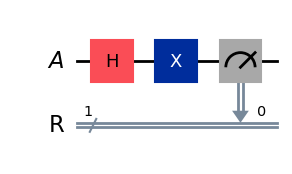

In [3]:
A = qis.QuantumRegister(1, "A")

R = qis.ClassicalRegister(1, "R")

neg_circ = QuantumCircuit(A, R)

neg_circ.h(A)
neg_circ.x(A)
neg_circ.measure(A, R)
display(neg_circ.draw('mpl'))

C:\Users\Botond\AppData\Local\Temp\ipykernel_18168\3257245846.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(neg_circ).result()


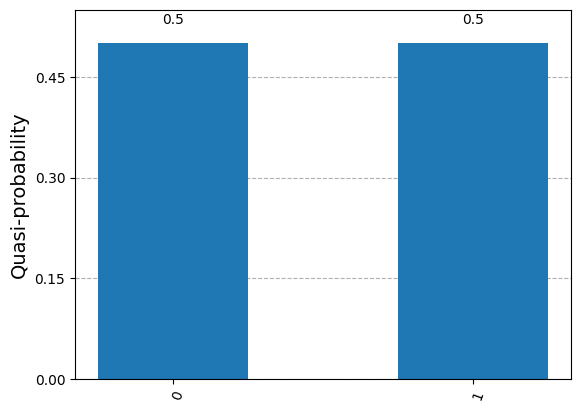

In [4]:
results = Sampler().run(neg_circ).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

- Conjuction:

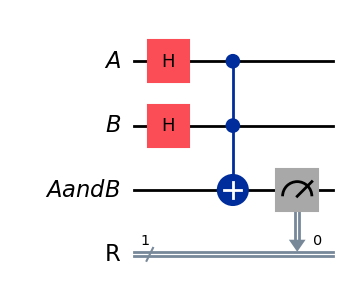

In [5]:
A = qis.QuantumRegister(1, "A")
B = qis.QuantumRegister(1, "B")
AandB = qis.QuantumRegister(1, "AandB")

R = qis.ClassicalRegister(1, "R")

conj_circ = QuantumCircuit(A, B, AandB, R)

conj_circ.h(A)
conj_circ.h(B)
conj_circ.ccx(A, B, AandB)

conj_circ.measure(AandB, R)

display(conj_circ.draw('mpl'))

C:\Users\Botond\AppData\Local\Temp\ipykernel_18168\32153764.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(conj_circ).result()


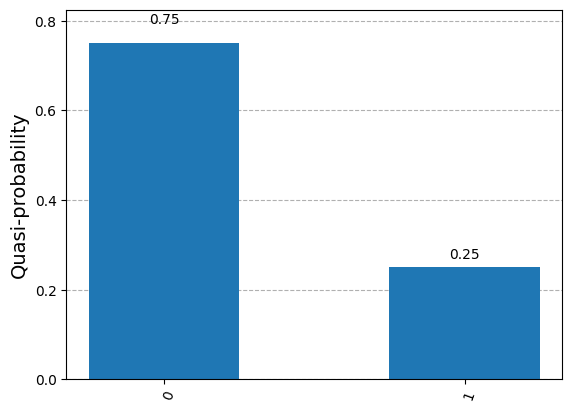

In [6]:
results = Sampler().run(conj_circ).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

- Disjunction:

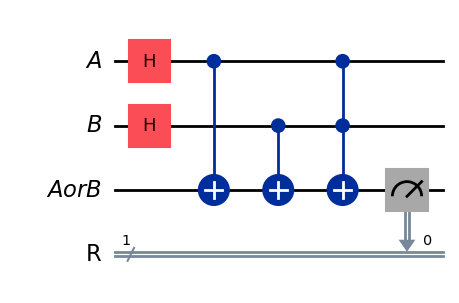

In [7]:
A = qis.QuantumRegister(1, "A")
B = qis.QuantumRegister(1, "B")
AorB = qis.QuantumRegister(1, "AorB")

R = qis.ClassicalRegister(1, "R")

disj_circ = QuantumCircuit(A, B, AorB, R)

disj_circ.h(A)
disj_circ.h(B)

disj_circ.cx(A, AorB)
disj_circ.cx(B, AorB)

disj_circ.ccx(A, B, AorB)


#disj_circ.x(AorB)
disj_circ.measure(AorB, R)

display(disj_circ.draw('mpl'))

C:\Users\Botond\AppData\Local\Temp\ipykernel_18168\747798611.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(disj_circ).result()


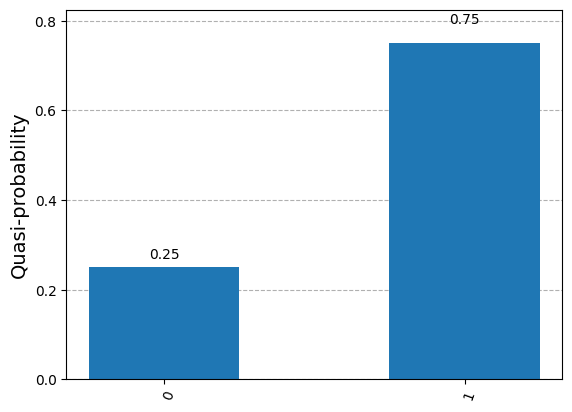

In [8]:
results = Sampler().run(disj_circ).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

Exclusive OR (XOR):

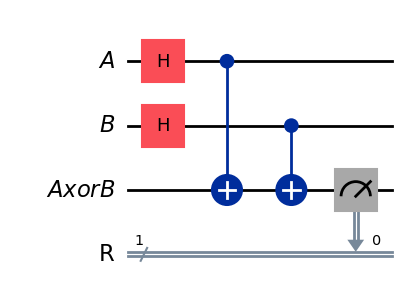

In [9]:
A = qis.QuantumRegister(1, "A")
B = qis.QuantumRegister(1, "B")
AxorB = qis.QuantumRegister(1, "AxorB")

R = qis.ClassicalRegister(1, "R")

xor_circ = QuantumCircuit(A, B, AxorB, R)

xor_circ.h(A)
xor_circ.h(B)

xor_circ.cx(A, AxorB)
xor_circ.cx(B, AxorB)

#disj_circ.x(AorB)
xor_circ.measure(AxorB, R)

display(xor_circ.draw('mpl'))

C:\Users\Botond\AppData\Local\Temp\ipykernel_18168\1743174099.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(xor_circ).result()


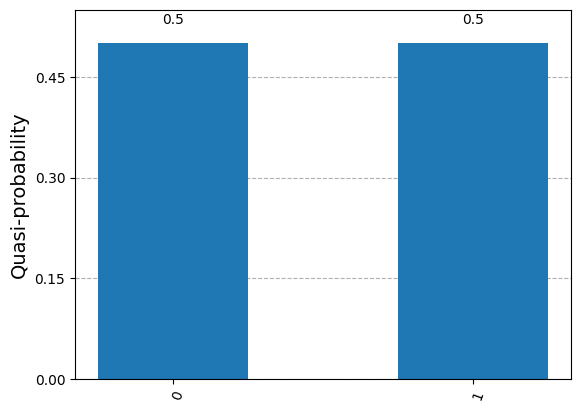

In [10]:
results = Sampler().run(xor_circ).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

- Implication:

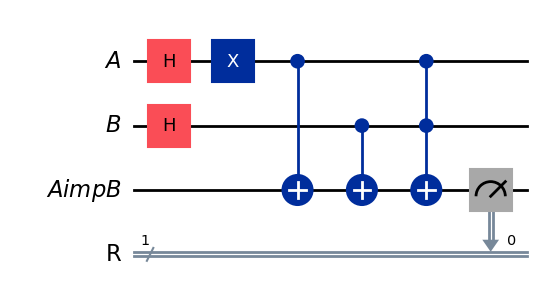

In [11]:
A = qis.QuantumRegister(1, "A")
B = qis.QuantumRegister(1, "B")
AimpB = qis.QuantumRegister(1, "AimpB")

R = qis.ClassicalRegister(1, "R")

impl_circ = QuantumCircuit(A, B, AimpB, R)

impl_circ.h(A)
impl_circ.x(A)
impl_circ.cx(A, AimpB)
impl_circ.h(B)
impl_circ.cx(B, AimpB)
impl_circ.ccx(A, B, AimpB)

impl_circ.measure(AimpB, R)

display(impl_circ.draw('mpl'))

C:\Users\Botond\AppData\Local\Temp\ipykernel_18168\209014416.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(impl_circ).result()


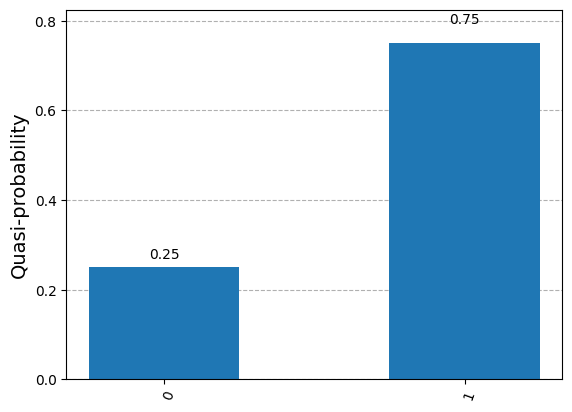

In [12]:
results = Sampler().run(impl_circ).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

- Biconditional:

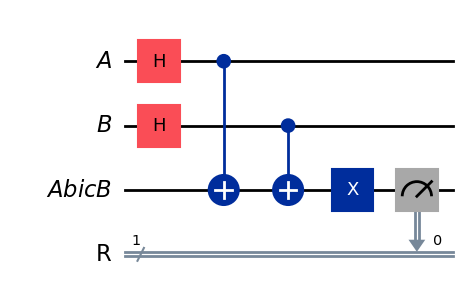

In [13]:
A = qis.QuantumRegister(1, "A")
B = qis.QuantumRegister(1, "B")
AbicB = qis.QuantumRegister(1, "AbicB")

R = qis.ClassicalRegister(1, "R")

bic_circ = QuantumCircuit(A, B, AbicB, R)

bic_circ.h(A)
bic_circ.h(B)

bic_circ.cx(A, AbicB)
bic_circ.cx(B, AbicB)

bic_circ.x(AbicB)

bic_circ.measure(AbicB, R)

display(bic_circ.draw('mpl'))

C:\Users\Botond\AppData\Local\Temp\ipykernel_18168\2584924672.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(bic_circ).result()


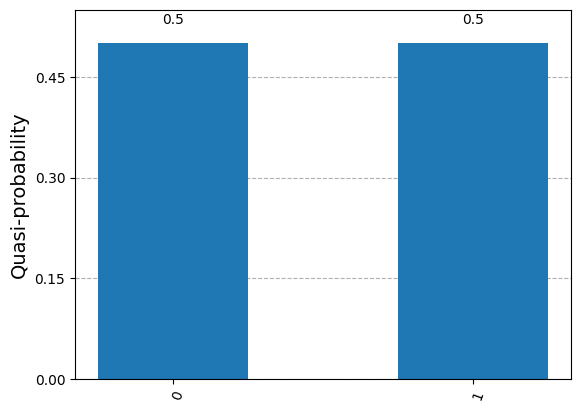

In [14]:
results = Sampler().run(bic_circ).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

## A more complex formula

Let's try something harder, for example:
$R = A \lor B \lor \neg C$

This can be decomposed as:
- $A \lor B = AorB$
- $ \neg C = notC$
- $AandB \lor notC = R$

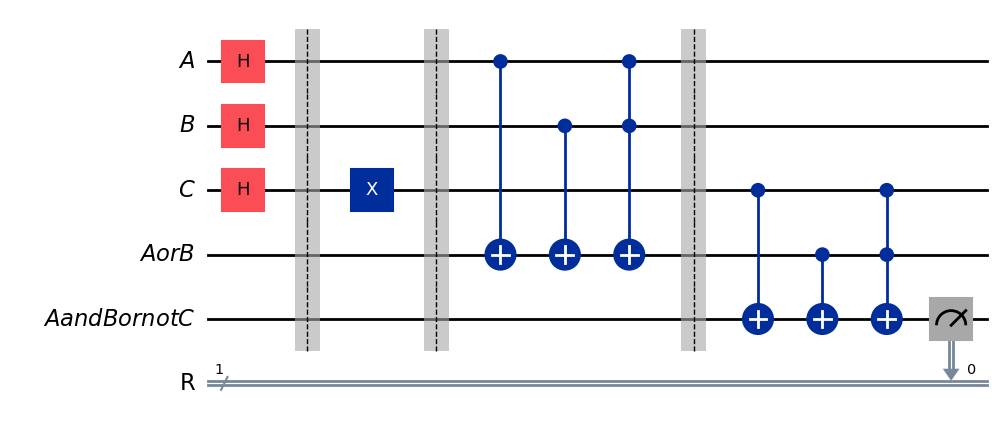

In [15]:
A = qis.QuantumRegister(1, "A")
B = qis.QuantumRegister(1, "B")
C = qis.QuantumRegister(1, "C")
AorB = qis.QuantumRegister(1, "AorB")
AorBornotC = qis.QuantumRegister(1, "AandBornotC")

R = qis.ClassicalRegister(1, "R")

circ = QuantumCircuit(A, B, C, AorB, AorBornotC, R)

circ.h(A)
circ.h(B)
circ.h(C)

circ.barrier()
circ.x(C) # = notC

circ.barrier()
circ.cx(A, AorB)
circ.cx(B, AorB)
circ.ccx(A, B, AorB) # = AorB

circ.barrier()
circ.cx(C, AorBornotC)
circ.cx(AorB, AorBornotC)
circ.ccx(C, AorB, AorBornotC)

circ.measure(AorBornotC, R)

display(circ.draw('mpl'))

C:\Users\Botond\AppData\Local\Temp\ipykernel_18168\600287555.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(circ).result()


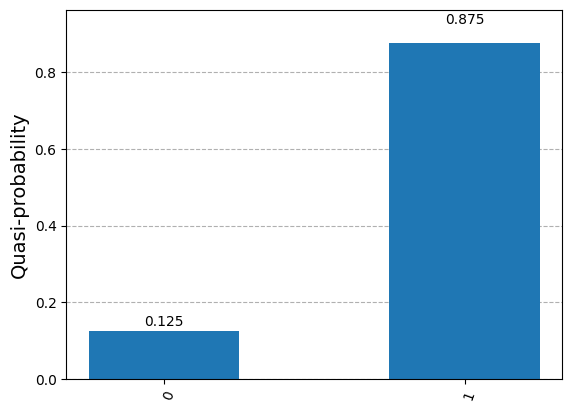

In [16]:
results = Sampler().run(circ).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

# Automated QC representation of logical connectives

The connectives are written in nested lists. Each needs to be decomposed to its purest form, when we have only one connective defined.

The logical connectives encoded are ["not","imp","and","or","xor","eq"]

By this notation the complex formula that I have defined/shown above is: 
-   ["or", ["or", "A", "B"], ["not", "C"]]

which we need to decompose into:
-   ["or", "A", "B"]
-   ["not", "C"]
-   and the final "or" argument

## The first output

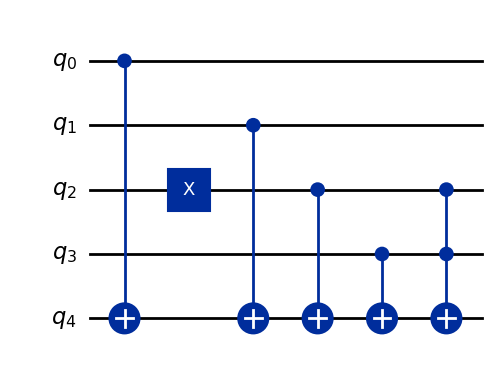

In [17]:
from qiskit import QuantumCircuit

def logical_to_quantum(expression, qubits_map, target_qubit):
    """Maps logical expressions, including implication, bijection, and XOR, to quantum circuits."""
    circuit = QuantumCircuit(len(qubits_map))  
    stack = [(expression, target_qubit)]  

    while stack:
        current, target = stack.pop()

        if isinstance(current, list) and len(current) > 1:  
            gate = current[0]  
            args = current[1:]

            # Ensure all variables exist in qubits_map
            for arg in args:
                if isinstance(arg, str) and arg not in qubits_map:
                    qubits_map[arg] = len(qubits_map)

            # Resolve qubit indices
            resolved_args = [qubits_map[arg] if isinstance(arg, str) else None for arg in args]

            if gate == "not" and resolved_args[0] is not None:  
                circuit.x(resolved_args[0])  
                circuit.cx(resolved_args[0], target)  

            elif gate == "and" and None not in resolved_args[:2]:  
                q1, q2 = resolved_args[:2]  
                circuit.ccx(q1, q2, target)  

            elif gate == "or" and None not in resolved_args[:2]:  
                q1, q2 = resolved_args[:2]  
                circuit.cx(q1, target)  
                circuit.cx(q2, target)  
                circuit.ccx(q1, q2, target)  

            elif gate == "xor" and None not in resolved_args[:2]:  
                q1, q2 = resolved_args[:2]  
                circuit.cx(q1, target)  
                circuit.cx(q2, target)  

            elif gate == "implication" and None not in resolved_args[:2]:  
                q1, q2 = resolved_args[:2] 
                circuit.x(q1)    
                circuit.cx(q1, target)  
                circuit.cx(q2, target)  
                circuit.ccx(q1, q2, target)  

            elif gate == "bijection" and None not in resolved_args[:2]:  
                q1, q2 = resolved_args[:2]  
                circuit.cx(q1, target)  
                circuit.cx(q2, target)  
                circuit.x(target) 

            else:
                for sub_expr in reversed(args):
                    stack.append((sub_expr, target))

    return circuit

# Example Logical Expression (with new connectives)
logical_expression = ["bijection", ["xor", "A", "B"], ["implication", "C", "D"]]

# Qubit Mapping
qubits_map = {"A": 0, "B": 1, "C": 2, "D": 3, "OUT": 4}  

# Generate Quantum Circuit
qc = logical_to_quantum(logical_expression, qubits_map, target_qubit=4)
qc.draw('mpl')  # Draw the circuit


## The second output

It now extracts the variables from the lists so we do not need to count the bits, logical connectives, or ancillas, it does that automatically.

Qubit Mapping: {'C': 0, 'D': 1, 'B': 2, 'A': 3, 'T1': 4, 'T2': 5, 'T3': 6, 'OUT': 7}


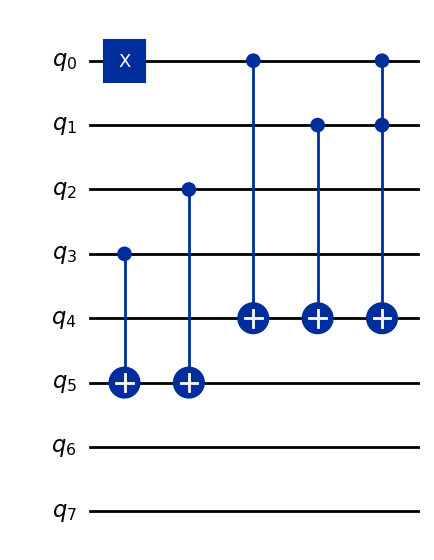

In [18]:
from qiskit import QuantumCircuit

def extract_variables(expr):
    """Recursively extract unique variables from the logical expression."""
    variables = set()
    if isinstance(expr, list):
        for sub_expr in expr[1:]:  # Skip the connective (e.g., "and", "or")
            variables.update(extract_variables(sub_expr))
    elif isinstance(expr, str):  # It's a variable (e.g., "A", "B")
        variables.add(expr)
    return variables

def count_connectives(expr):
    """Recursively count the number of logical connectives."""
    count = 0
    if isinstance(expr, list):
        count += 1  # Count this connective
        for sub_expr in expr[1:]:
            count += count_connectives(sub_expr)
    return count

def logical_to_quantum(expression):
    """Automatically maps logical expressions to quantum circuits with dynamic qubit allocation."""
    # Extract variables and count connectives
    variables = extract_variables(expression)
    num_ancilla = count_connectives(expression)

    # Dynamic Qubit Mapping
    qubits_map = {var: idx for idx, var in enumerate(variables)}
    ancilla_start = len(qubits_map)
    ancilla_map = {f"T{i+1}": ancilla_start + i for i in range(num_ancilla)}
    target_qubit = ancilla_start + num_ancilla  # Final output
    qubits_map.update(ancilla_map)
    qubits_map["OUT"] = target_qubit

    # Initialize Quantum Circuit
    circuit = QuantumCircuit(len(qubits_map))  
    stack = [(expression, target_qubit)]  
    ancilla_counter = 0

    while stack:
        current, target = stack.pop()

        if isinstance(current, list) and len(current) > 1:  
            gate = current[0]  
            args = current[1:]

            # Resolve qubit indices
            resolved_args = [qubits_map[arg] if isinstance(arg, str) else None for arg in args]

            if gate == "not" and resolved_args[0] is not None:  
                circuit.x(resolved_args[0])  
                circuit.cx(resolved_args[0], target)  

            elif gate == "and" and None not in resolved_args[:2]:  
                q1, q2 = resolved_args[:2]  
                circuit.ccx(q1, q2, target)  

            elif gate == "or" and None not in resolved_args[:2]:  
                q1, q2 = resolved_args[:2]  
                circuit.cx(q1, target)  
                circuit.cx(q2, target)  
                circuit.ccx(q1, q2, target)  

            elif gate == "xor" and None not in resolved_args[:2]:  
                q1, q2 = resolved_args[:2]  
                circuit.cx(q1, target)  
                circuit.cx(q2, target)  

            elif gate == "implication" and None not in resolved_args[:2]:  
                q1, q2 = resolved_args[:2] 
                circuit.x(q1)    
                circuit.cx(q1, target)  
                circuit.cx(q2, target)  
                circuit.ccx(q1, q2, target)  

            elif gate == "bijection" and None not in resolved_args[:2]:  
                q1, q2 = resolved_args[:2]  
                circuit.cx(q1, target)  
                circuit.cx(q2, target)  
                circuit.x(target)  

            else:
                for sub_expr in reversed(args):
                    if isinstance(sub_expr, list):
                        ancilla_counter += 1
                        ancilla_target = ancilla_start + ancilla_counter - 1
                        stack.append((sub_expr, ancilla_target))
                    else:
                        stack.append((sub_expr, target))

    return circuit, qubits_map

# Example Logical Expression
#logical_expression = ["or", ["or", "A", "B"], ["not", "C"]]
logical_expression = ["bijection", ["xor", "A", "B"], ["implication", "C", "D"]]

# Generate Quantum Circuit with Dynamic Qubit Allocation
qc, qubits_map = logical_to_quantum(logical_expression)
print("Qubit Mapping:", qubits_map)
qc.draw('mpl')  # Draw the circuit


In [19]:
variables = extract_variables(logical_expression)
variables

{'A', 'B', 'C', 'D'}

In [20]:
num_ancilla = count_connectives(logical_expression)
num_ancilla

3

## The third output

It now dropped the last qubit as we will measure the last ancilla, not an additional out qubit (we cant copy), and also we have added Hadamard gates for the input qubits as we want them to be in superposition.

Qubit Mapping: {'C': 0, 'D': 1, 'B': 2, 'A': 3, 'T1': 4, 'T2': 5, 'T3': 6}


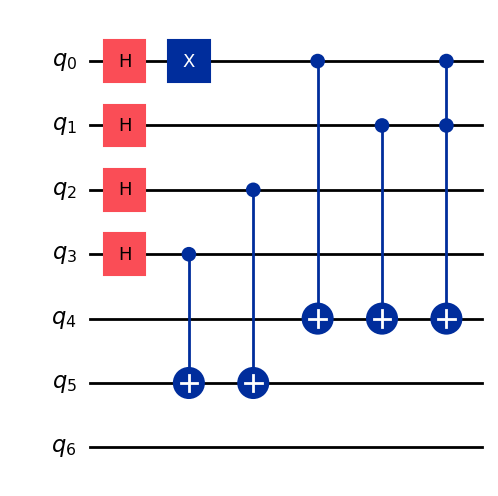

In [21]:
from qiskit import QuantumCircuit

def extract_variables(expr):
    """Recursively extract unique variables from the logical expression."""
    variables = set()
    if isinstance(expr, list):
        for sub_expr in expr[1:]:  # Skip the connective (e.g., "and", "or")
            variables.update(extract_variables(sub_expr))
    elif isinstance(expr, str):  # It's a variable (e.g., "A", "B")
        variables.add(expr)
    return variables

def count_connectives(expr):
    """Recursively count the number of logical connectives."""
    count = 0
    if isinstance(expr, list):
        count += 1  # Count this connective
        for sub_expr in expr[1:]:
            count += count_connectives(sub_expr)
    return count

def logical_to_quantum(expression):
    """Automatically maps logical expressions to quantum circuits with dynamic qubit allocation."""
    # Extract variables and count connectives
    variables = extract_variables(expression)
    num_ancilla = count_connectives(expression)

    # Dynamic Qubit Mapping
    qubits_map = {var: idx for idx, var in enumerate(variables)}
    ancilla_start = len(qubits_map)
    ancilla_map = {f"T{i+1}": ancilla_start + i for i in range(num_ancilla)}
    qubits_map.update(ancilla_map)

    # Initialize Quantum Circuit
    circuit = QuantumCircuit(len(qubits_map))  
    stack = [(expression, ancilla_start + num_ancilla - 1)]  # Final output in the last ancilla
    ancilla_counter = 0

    # 🔥 Add Hadamard Gates to Basis Qubits
    basis_qubits = set(range(len(variables)))  # Indices of the logical variables
    for q in basis_qubits:
        circuit.h(q)  # Apply Hadamard to each basis qubit

    while stack:
        current, target = stack.pop()

        if isinstance(current, list) and len(current) > 1:  
            gate = current[0]  
            args = current[1:]

            # Resolve qubit indices
            resolved_args = [qubits_map[arg] if isinstance(arg, str) else None for arg in args]

            if gate == "not" and resolved_args[0] is not None:  
                circuit.x(resolved_args[0])  
                circuit.cx(resolved_args[0], target)  

            elif gate == "and" and None not in resolved_args[:2]:  
                q1, q2 = resolved_args[:2]  
                circuit.ccx(q1, q2, target)  

            elif gate == "or" and None not in resolved_args[:2]:  
                q1, q2 = resolved_args[:2]  
                circuit.cx(q1, target)  
                circuit.cx(q2, target)  
                circuit.ccx(q1, q2, target)  

            elif gate == "xor" and None not in resolved_args[:2]:  
                q1, q2 = resolved_args[:2]  
                circuit.cx(q1, target)  
                circuit.cx(q2, target)  

            elif gate == "implication" and None not in resolved_args[:2]:  
                q1, q2 = resolved_args[:2] 
                circuit.x(q1)    
                circuit.cx(q1, target)  
                circuit.cx(q2, target)  
                circuit.ccx(q1, q2, target)  

            elif gate == "bijection" and None not in resolved_args[:2]:  
                q1, q2 = resolved_args[:2]  
                circuit.cx(q1, target)  
                circuit.cx(q2, target)  
                circuit.x(target)    

            else:
                for sub_expr in reversed(args):
                    if isinstance(sub_expr, list):
                        ancilla_counter += 1
                        ancilla_target = ancilla_start + ancilla_counter - 1
                        stack.append((sub_expr, ancilla_target))
                    else:
                        stack.append((sub_expr, target))

    return circuit, qubits_map

# Example Logical Expression
logical_expression = ["bijection", ["xor", "A", "B"], ["implication", "C", "D"]]

# Generate Quantum Circuit with Dynamic Qubit Allocation
qc, qubits_map = logical_to_quantum(logical_expression)
print("Qubit Mapping:", qubits_map)
qc.draw('mpl')  # Draw the circuit


In [22]:
variables = extract_variables(logical_expression)
variables

{'A', 'B', 'C', 'D'}

In [23]:
num_ancilla = count_connectives(logical_expression)
num_ancilla

3

## The fourth output

We have added the final logical connective as well as it has been skipped beforehand

Final result stored in qubit: 6
Qubit Mapping: {'C': 0, 'D': 1, 'B': 2, 'A': 3, 'T1': 4, 'T2': 5, 'T3': 6}


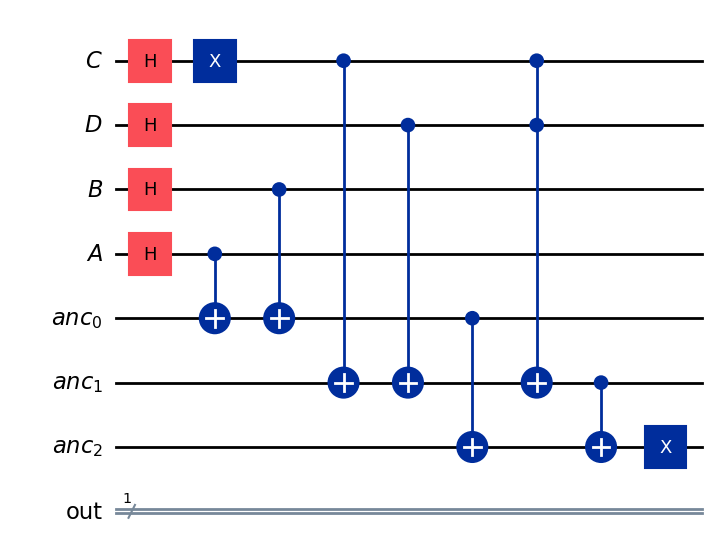

In [24]:
from qiskit import QuantumCircuit

def extract_variables(expr):
    """Recursively extract unique variables from the logical expression."""
    variables = set()
    if isinstance(expr, list):
        for sub_expr in expr[1:]:  # Skip the connective (e.g., "and", "or")
            variables.update(extract_variables(sub_expr))
    elif isinstance(expr, str):  # It's a variable (e.g., "A", "B")
        variables.add(expr)
    return variables

def count_connectives(expr):
    """Recursively count the number of logical connectives."""
    count = 0
    if isinstance(expr, list):
        count += 1  # Count this connective
        for sub_expr in expr[1:]:
            count += count_connectives(sub_expr)
    return count

def resolve_expression(expr, circuit, qubits_map, ancilla_start, ancilla_counter):
    """
    Recursively resolve nested logical expressions.
    Returns the qubit index storing the result of this sub-expression.
    """
    if isinstance(expr, str):  # It's a variable
        return qubits_map[expr]
    
    if isinstance(expr, list) and len(expr) > 1:
        gate = expr[0]  # The logical connective (e.g., "and", "or", etc.)
        args = expr[1:]

        # Resolve arguments recursively
        resolved_args = [resolve_expression(arg, circuit, qubits_map, ancilla_start, ancilla_counter) for arg in args]

        # Allocate ancilla for this operation
        target = ancilla_start + ancilla_counter[0]
        ancilla_counter[0] += 1  # Increment the counter

        # Apply Quantum Gates for Logical Connectives

        if gate == "not" and resolved_args[0] is not None:  
            circuit.x(resolved_args[0])  
            circuit.cx(resolved_args[0], target)  
            
        elif gate == "and" and None not in resolved_args[:2]:  
            q1, q2 = resolved_args[:2]  
            circuit.ccx(q1, q2, target)  

        elif gate == "or" and None not in resolved_args[:2]:  
            q1, q2 = resolved_args[:2]  
            circuit.cx(q1, target)  
            circuit.cx(q2, target)  
            circuit.ccx(q1, q2, target)  

        elif gate == "xor" and None not in resolved_args[:2]:  
            q1, q2 = resolved_args[:2]  
            circuit.cx(q1, target)  
            circuit.cx(q2, target)  

        elif gate == "implication" and None not in resolved_args[:2]:  
            q1, q2 = resolved_args[:2] 
            circuit.x(q1)    
            circuit.cx(q1, target)  
            circuit.cx(q2, target)  
            circuit.ccx(q1, q2, target)  

        elif gate == "bijection" and None not in resolved_args[:2]:  
            q1, q2 = resolved_args[:2]  
            circuit.cx(q1, target)  
            circuit.cx(q2, target)  
            circuit.x(target)    

        else:
            raise ValueError(f"Unknown or improperly formatted gate: {gate}")
        
        return target

def logical_to_quantum(expression):
    """Automatically maps logical expressions to quantum circuits with dynamic qubit allocation."""
    # Extract variables and count connectives
    variables = extract_variables(expression)
    num_ancilla = count_connectives(expression)

    # Dynamic Qubit Mapping
    qubits_map = {var: idx for idx, var in enumerate(variables)}
    ancilla_start = len(qubits_map)
    ancilla_map = {f"T{i+1}": ancilla_start + i for i in range(num_ancilla)}
    qubits_map.update(ancilla_map)

    # Initialize Quantum Circuit
    Xcircuit = QuantumCircuit(len(qubits_map))
    
    circuit = QuantumCircuit()
    for name in variables:
        qreg = QuantumRegister(1, name=name)
        circuit.add_register(qreg)
        
    anc_reg = QuantumRegister(num_ancilla, name = "anc")
    out_reg = ClassicalRegister(1, name = "out")
    circuit.add_register(anc_reg, out_reg)

    # 🔥 Add Hadamard Gates to Basis Qubits
    basis_qubits = set(range(len(variables)))  # Indices of the logical variables
    for q in basis_qubits:
        circuit.h(q)  # Apply Hadamard to each basis qubit

    # Resolve the expression
    ancilla_counter = [0]  # Use a list to keep the counter mutable
    final_result = resolve_expression(expression, circuit, qubits_map, ancilla_start, ancilla_counter)
    print(f"Final result stored in qubit: {final_result}")
    
    return circuit, qubits_map

# Example Logical Expression
logical_expression = ["bijection", ["xor", "A", "B"], ["implication", "C", "D"]]

# Generate Quantum Circuit with Dynamic Qubit Allocation
qc, qubits_map = logical_to_quantum(logical_expression)
print("Qubit Mapping:", qubits_map)
qc.draw('mpl')  # Draw the circuit


In [25]:
num_ancilla = count_connectives(logical_expression)
num_ancilla

3

In [26]:
variables = extract_variables(logical_expression)
variables

{'A', 'B', 'C', 'D'}

## dump for additional improvements

Renaming the qubits as the logical inputs

Final result stored in qubit: 6
Qubit Mapping: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'T1': 4, 'T2': 5, 'T3': 6}


C:\Users\Botond\AppData\Local\Temp\ipykernel_18168\274428597.py:146: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()  # Show the figure with qubit labels


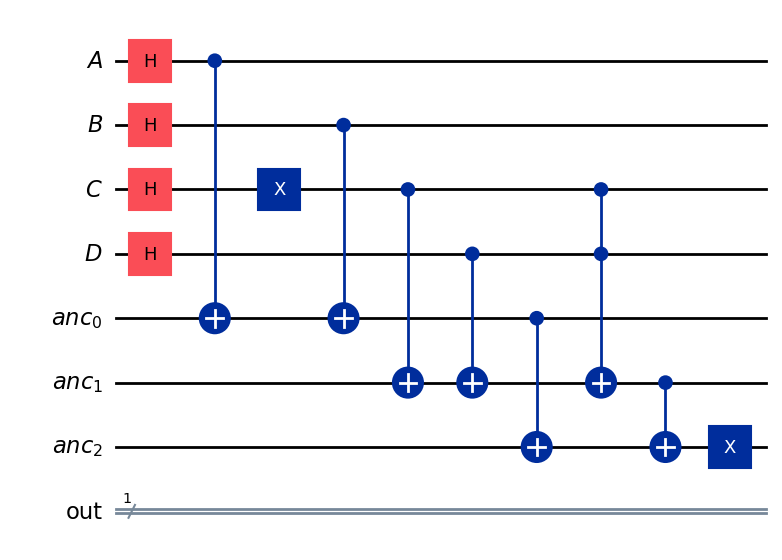

In [27]:
from qiskit import QuantumCircuit, QuantumRegister

def extract_variables(expr):
    """Recursively extract unique variables from the logical expression.
    Checks if expr is a list and if it is it skips the first element (the logical connective)
    and adds the variables to the set (which is good because automatically handles the duplicates)"""
    variables = set()
    if isinstance(expr, list):
        for sub_expr in expr[1:]:  # Skip the connective (e.g., "and", "or")
            variables.update(extract_variables(sub_expr))
    elif isinstance(expr, str):  # It's a variable (e.g., "A", "B")
        variables.add(expr)
    return variables

def count_connectives(expr):
    """Recursively count the number of logical connectives.
    Checks if expr is a list and if it is it adds +1 to count"""
    count = 0
    if isinstance(expr, list):
        count += 1  # Count this connective
        for sub_expr in expr[1:]:
            count += count_connectives(sub_expr)
    return count

def resolve_expression(expr, circuit, qubits_map, ancilla_start, ancilla_counter):
    """Recursively resolve nested logical expressions and translate them to Q gates.
    Returns the qubit index storing the result of this sub-expression."""
    if isinstance(expr, str):  # It's a variable
        return qubits_map[expr]
    
    if isinstance(expr, list) and len(expr) > 1:
        """If the expr is a list it selects the first argument as the gate (logical connective) and the others as the qubits"""
        gate = expr[0]  # The logical connective (e.g., "and", "or", etc.)
        args = expr[1:]

        # Resolve arguments recursively
        """By rerunning it we get the arguments as they form a sting when checking with the isinstance and collects them"""
        resolved_args = [resolve_expression(arg, circuit, qubits_map, ancilla_start, ancilla_counter) for arg in args]

        # Allocate ancilla for this operation
        """For every quantum gate set we have an ancilla where we store the final output
        the position of this ancilla must shift/change so we do not get piled up"""
        target = ancilla_start + ancilla_counter[0]
        ancilla_counter[0] += 1  # Increment the counter

        # Apply Quantum Gates for Logical Connectives
        """Then it applies the quantum gate representing the logical connective"""
        if gate == "not" and len(resolved_args) == 1:
            circuit.x(resolved_args[0])  
            circuit.cx(resolved_args[0], target)  

        elif gate == "and" and len(resolved_args) == 2:
            q1, q2 = resolved_args
            circuit.ccx(q1, q2, target)  

        elif gate == "or" and len(resolved_args) == 2:
            q1, q2 = resolved_args
            circuit.cx(q1, target)  
            circuit.cx(q2, target)  
            circuit.ccx(q1, q2, target)  

        elif gate == "xor" and len(resolved_args) == 2:
            q1, q2 = resolved_args
            circuit.cx(q1, target)  
            circuit.cx(q2, target)  

        elif gate == "implication" and len(resolved_args) == 2:
            q1, q2 = resolved_args
            circuit.x(q1)    
            circuit.cx(q1, target)  
            circuit.cx(q2, target)  
            circuit.ccx(q1, q2, target)  

        elif gate == "bijection" and len(resolved_args) == 2:
            q1, q2 = resolved_args
            circuit.cx(q1, target)  
            circuit.cx(q2, target)  
            circuit.x(target)  

        else:
            raise ValueError(f"Unknown or improperly formatted gate: {gate}")
        
        return target

def logical_to_quantum(expression):
    """Automatically maps logical expressions to quantum circuits with dynamic qubit allocation."""
    # Extract variables and count connectives
    variables = extract_variables(expression)
    num_ancilla = count_connectives(expression)

    # Dynamic Qubit Mapping
    var_list = sorted(list(variables))  #sort the variables
    qubits_map = {var: idx for idx, var in enumerate(var_list)} #get the qubits from the no. of variables
    ancilla_start = len(qubits_map) #have the ancillas properly sorted
    ancilla_map = {f"T{i+1}": ancilla_start + i for i in range(num_ancilla)}    #get the qubits from the no. of ancillas
    qubits_map.update(ancilla_map)  #update the no. of qubits

    # Create Quantum Register with Named Qubits

    circuit = QuantumCircuit()
    for name in sorted(variables):
        qreg = QuantumRegister(1, name=name)
        circuit.add_register(qreg)
        
    anc_reg = QuantumRegister(num_ancilla, name = "anc")
    out_reg = ClassicalRegister(1, name = "out")
    circuit.add_register(anc_reg, out_reg)
        
    #qreg = QuantumRegister(len(qubits_map), name="q")
    #creg = ClassicalRegister(1, name="OUT")
    #circuit = QuantumCircuit(qreg, creg) #generate the quantum registers and circuit based on the no. of variables + ancillas
    
    
    #Add Hadamard Gates to Basis Qubits to create superposition
    basis_qubits = set(range(len(variables)))  # Indices of the logical variables
    for q in basis_qubits:
        circuit.h(q)  # Apply Hadamard to each basis qubit

    # Resolve the expression
    ancilla_counter = [0]  # Use a list to keep the counter mutable
    final_result = resolve_expression(expression, circuit, qubits_map, ancilla_start, ancilla_counter)
    print(f"Final result stored in qubit: {final_result}")  #show where do we store the final qubit
    
    return circuit, qubits_map

def draw_with_labels(circuit, qubits_map):
    """Draws the circuit with labels."""
    fig = circuit.draw('mpl')
    ax = fig.get_axes()[0]

    # Annotate qubits with variable names
    for var, qubit_idx in qubits_map.items():
        ax.text(0, qubit_idx, var, horizontalalignment='center', verticalalignment='center', color='red', fontsize=12)

    return fig

# Example Logical Expression
logical_expression = ["bijection", ["xor", "A", "B"], ["implication", "C", "D"]]

# Generate Quantum Circuit with Dynamic Qubit Allocation
qc, qubits_map = logical_to_quantum(logical_expression)
print("Qubit Mapping:", qubits_map)

# Draw the circuit with labels
fig = draw_with_labels(qc, qubits_map)
fig.show()  # Show the figure with qubit labels

qc.draw('mpl')  # Draw the circuit


In [28]:
variables = extract_variables(logical_expression)
variables



{'A', 'B', 'C', 'D'}

In [29]:
num_ancilla = count_connectives(logical_expression)
num_ancilla

3

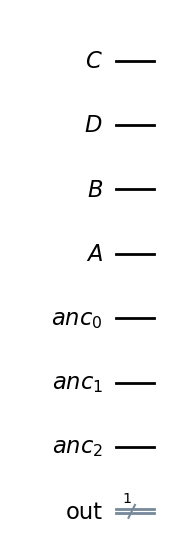

In [30]:
circuit = QuantumCircuit()
for name in variables:
    qreg = QuantumRegister(1, name=name)
    circuit.add_register(qreg)
        
anc_reg = QuantumRegister(num_ancilla, name = "anc")
out_reg = ClassicalRegister(1, name = "out")
circuit.add_register(anc_reg, out_reg)
    
circuit.draw('mpl')

In [31]:
for name in sorted(variables):
    print(name)

A
B
C
D


In [32]:
variables

{'A', 'B', 'C', 'D'}

## Tested deeply nested lists

Qubit Mapping: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'anc1': 6, 'anc2': 7, 'anc3': 8, 'anc4': 9, 'anc5': 10}


C:\Users\Botond\AppData\Local\Temp\ipykernel_18168\936191934.py:146: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()  # Show the figure with qubit labels


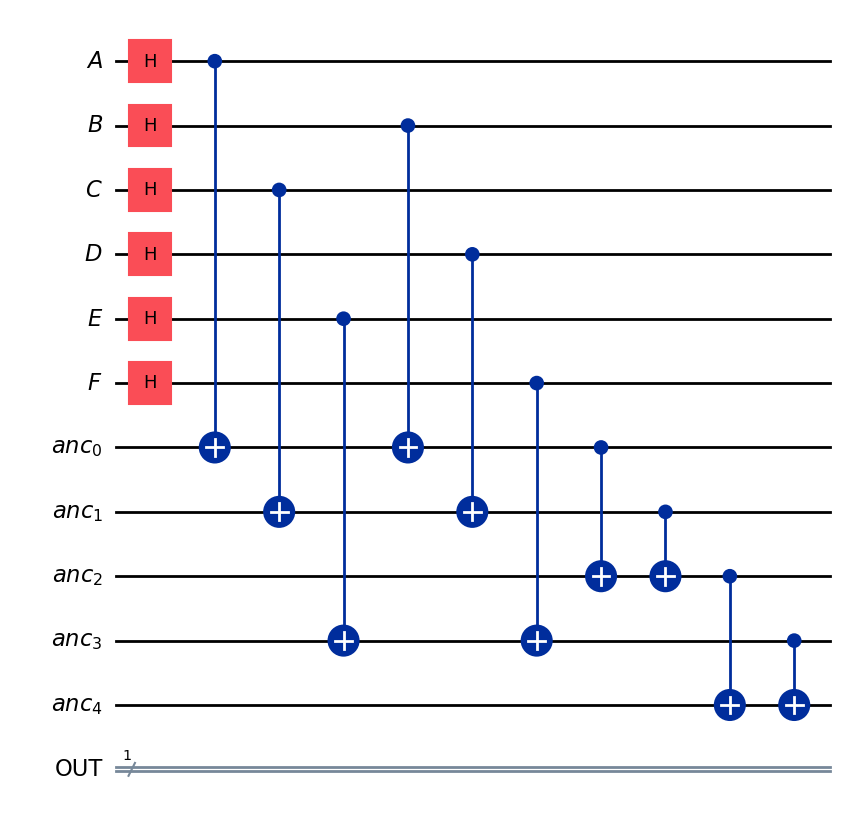

In [37]:
from qiskit import QuantumCircuit, QuantumRegister

def extract_variables(expr):
    """Recursively extract unique variables from the logical expression.
    Checks if expr is a list and if it is it skips the first element (the logical connective)
    and adds the variables to the set (which is good because automatically handles the duplicates)"""
    variables = set()
    if isinstance(expr, list):
        for sub_expr in expr[1:]:  # Skip the connective (e.g., "and", "or")
            variables.update(extract_variables(sub_expr))
    elif isinstance(expr, str):  # It's a variable (e.g., "A", "B")
        variables.add(expr)
    return variables

def count_connectives(expr):
    """Recursively count the number of logical connectives.
    Checks if expr is a list and if it is it adds +1 to count"""
    count = 0
    if isinstance(expr, list):
        count += 1  # Count this connective
        for sub_expr in expr[1:]:
            count += count_connectives(sub_expr)
    return count

def resolve_expression(expr, circuit, qubits_map, ancilla_start, ancilla_counter):
    """Recursively resolve nested logical expressions and translate them to Q gates.
    Returns the qubit index storing the result of this sub-expression."""
    if isinstance(expr, str):  # It's a variable
        return qubits_map[expr]
    
    if isinstance(expr, list) and len(expr) > 1:
        """If the expr is a list it selects the first argument as the gate (logical connective) and the others as the qubits"""
        gate = expr[0]  # The logical connective (e.g., "and", "or", etc.)
        args = expr[1:]

        # Resolve arguments recursively
        """By rerunning it we get the arguments as they form a sting when checking with the isinstance and collects them"""
        resolved_args = [resolve_expression(arg, circuit, qubits_map, ancilla_start, ancilla_counter) for arg in args]

        # Allocate ancilla for this operation
        """For every quantum gate set we have an ancilla where we store the final output
        the position of this ancilla must shift/change so we do not get piled up"""
        target = ancilla_start + ancilla_counter[0]
        ancilla_counter[0] += 1  # Increment the counter

        # Apply Quantum Gates for Logical Connectives
        """Then it applies the quantum gate representing the logical connective"""
        if gate == "not" and len(resolved_args) == 1:
            circuit.x(resolved_args[0])  
            circuit.cx(resolved_args[0], target)  

        elif gate == "and" and len(resolved_args) == 2:
            q1, q2 = resolved_args
            circuit.ccx(q1, q2, target)  

        elif gate == "or" and len(resolved_args) == 2:
            q1, q2 = resolved_args
            circuit.cx(q1, target)  
            circuit.cx(q2, target)  
            circuit.ccx(q1, q2, target)  

        elif gate == "xor" and len(resolved_args) == 2:
            q1, q2 = resolved_args
            circuit.cx(q1, target)  
            circuit.cx(q2, target)  

        elif gate == "implication" and len(resolved_args) == 2:
            q1, q2 = resolved_args
            circuit.x(q1)    
            circuit.cx(q1, target)  
            circuit.cx(q2, target)  
            circuit.ccx(q1, q2, target)  

        elif gate == "bijection" and len(resolved_args) == 2:
            q1, q2 = resolved_args
            circuit.cx(q1, target)  
            circuit.cx(q2, target)  
            circuit.x(target)  

        else:
            raise ValueError(f"Unknown or improperly formatted gate: {gate}")
        
        return target

def logical_to_quantum(expression):
    """Automatically maps logical expressions to quantum circuits with dynamic qubit allocation."""
    # Extract variables and count connectives
    variables = extract_variables(expression)
    num_ancilla = count_connectives(expression)

    # Dynamic Qubit Mapping
    var_list = sorted(list(variables))  #sort the variables
    qubits_map = {var: idx for idx, var in enumerate(var_list)} #get the qubits from the no. of variables
    ancilla_start = len(qubits_map) #have the ancillas properly sorted
    ancilla_map = {f"anc{i+1}": ancilla_start + i for i in range(num_ancilla)}    #get the qubits from the no. of ancillas
    qubits_map.update(ancilla_map)  #update the no. of qubits

    # Create Quantum Register with Named Qubits

    circuit = QuantumCircuit()
    for name in sorted(variables):
        qreg = QuantumRegister(1, name=name)
        circuit.add_register(qreg)
        
    anc_reg = QuantumRegister(num_ancilla, name = "anc")
    out_reg = ClassicalRegister(1, name = "OUT")
    circuit.add_register(anc_reg, out_reg)
        
    #qreg = QuantumRegister(len(qubits_map), name="q")
    #creg = ClassicalRegister(1, name="OUT")
    #circuit = QuantumCircuit(qreg, creg) #generate the quantum registers and circuit based on the no. of variables + ancillas
    
    
    #Add Hadamard Gates to Basis Qubits to create superposition
    basis_qubits = set(range(len(variables)))  # Indices of the logical variables
    for q in basis_qubits:
        circuit.h(q)  # Apply Hadamard to each basis qubit

    # Resolve the expression
    ancilla_counter = [0]  # Use a list to keep the counter mutable
    final_result = resolve_expression(expression, circuit, qubits_map, ancilla_start, ancilla_counter)
    #print(f"Final result stored in qubit: {final_result}")  #show where do we store the final qubit
    
    return circuit, qubits_map

def draw_with_labels(circuit, qubits_map):
    """Draws the circuit with labels."""
    fig = circuit.draw('mpl')
    ax = fig.get_axes()[0]

    # Annotate qubits with variable names
    for var, qubit_idx in qubits_map.items():
        ax.text(0, qubit_idx, var, horizontalalignment='center', verticalalignment='center', color='red', fontsize=12)

    return fig

# Example Logical Expression
anything = ["xor", ["xor", ["xor", "A", "B"], ["xor", "C", "D"]], ["xor", "E", "F"]]

# Generate Quantum Circuit with Dynamic Qubit Allocation
qc, qubits_map = logical_to_quantum(anything)
print("Qubit Mapping:", qubits_map)

# Draw the circuit with labels
fig = draw_with_labels(qc, qubits_map)
fig.show()  # Show the figure with qubit labels

qc.draw('mpl')  # Draw the circuit


In [34]:
variables = extract_variables(anything)
variables

{'A', 'B', 'C', 'D', 'E', 'F'}

In [35]:
num_ancilla = count_connectives(anything)
num_ancilla

5

## Now some other things, mostly unused and not working

In [ ]:
from qiskit import QuantumCircuit

# Extract variables from the logical expression
def extract_variables(expression):
    variables = set()
    stack = [expression]
    while stack:
        current = stack.pop()
        if isinstance(current, list):
            stack.extend(current[1:])  # Skip the gate (first element)
        elif isinstance(current, str) and current not in {'and', 'or', 'not', 'xor', 'implication', 'bijection'}:
            variables.add(current)
    return list(variables)

# Count logical connectives to determine number of ancillas
def count_connectives(expression):
    count = 0
    stack = [expression]
    while stack:
        current = stack.pop()
        if isinstance(current, list) and current[0] in {'and', 'or', 'not', 'xor', 'implication', 'bijection'}:
            count += 1
            stack.extend(current[1:])
    return count

# Quantum circuit builder
def logical_to_quantum(expression):
    variables = extract_variables(expression)
    num_ancilla = count_connectives(expression)
    qubits_map = {var: idx for idx, var in enumerate(variables)}
    ancilla_start = len(qubits_map)  # Ancillas start after the variables

    # Initialize quantum circuit with ancillas for each connective
    circuit = QuantumCircuit(len(qubits_map) + num_ancilla)
    
    # Apply Hadamard gates to variable qubits (not ancillas)
    for idx in range(len(qubits_map)):
        circuit.h(idx)
    ancilla_counter = 0
    stack = [(expression, ancilla_start + ancilla_counter)]
    ancilla_counter += 1

    while stack:
        current, current, target = stack.pop()
        if target < ancilla_start:  # If target is a variable, allocate new ancilla for connective
            target = ancilla_start + ancilla_counter
            ancilla_counter += 1

        if isinstance(current, list) and len(current) > 1:
            gate = current[0]
            args = current[1:]
            resolved_args = [qubits_map[arg] if isinstance(arg, str) else None for arg in args]

            if gate == "not" and resolved_args[0] is not None:  
                circuit.x(resolved_args[0])  
                circuit.cx(resolved_args[0], target)  

            elif gate == "and" and None not in resolved_args[:2]:  
                q1, q2 = resolved_args[:2]  
                circuit.ccx(q1, q2, target)  

            elif gate == "or" and None not in resolved_args[:2]:  
                q1, q2 = resolved_args[:2]  
                circuit.cx(q1, target)  
                circuit.cx(q2, target)  
                circuit.ccx(q1, q2, target)  

            elif gate == "xor" and None not in resolved_args[:2]:  
                q1, q2 = resolved_args[:2]  
                circuit.cx(q1, target)  
                circuit.cx(q2, target)  

            elif gate == "implication" and None not in resolved_args[:2]:  
                q1, q2 = resolved_args[:2] 
                circuit.x(q1)    
                circuit.cx(q1, target)  
                circuit.cx(q2, target)  
                circuit.ccx(q1, q2, target)  

            elif gate == "bijection" and None not in resolved_args[:2]:  
                q1, q2 = resolved_args[:2]  
                circuit.cx(q1, target)  
                circuit.cx(q2, target)  
                circuit.x(target) 

            else:
                for sub_expr in reversed(args):
                    if isinstance(sub_expr, list):
                        ancilla_target = ancilla_start + ancilla_counter
                        ancilla_counter += 1
                        stack.append((sub_expr, ancilla_target))
                    else:
                        stack.append((sub_expr, target))

    return circuit, qubits_map

# Example Logical Expression
logical_expression = ["bijection", ["xor", "A", "B"], ["implication", "C", "D"]]

# Generate Quantum Circuit
qc, qubits_map = logical_to_quantum(logical_expression)
print("Qubit Mapping:", qubits_map)
qc.draw('mpl')
